In [1]:
import pandas as pd
import numpy as np
import copy

%matplotlib inline

-

In [2]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


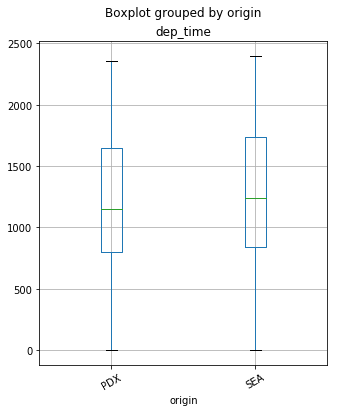

In [4]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

In [5]:
# make a copy of the dataset

copy_df = df_flights.select_dtypes(include=['object']).copy()

In [6]:
copy_df.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [7]:
copy_df.isnull().values.sum()

248

In [8]:
copy_df['carrier'].value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

In [9]:
copy_df['carrier'].value_counts().count()

11

In [10]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

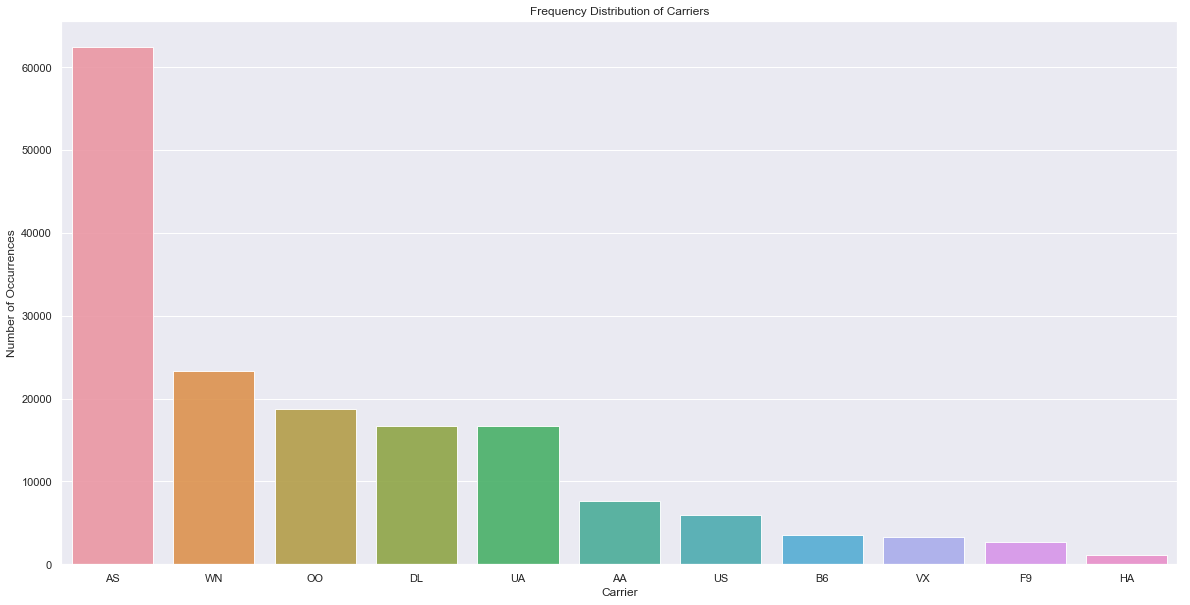

In [16]:
carrier_count = copy_df['carrier'].value_counts()

plt.figure(figsize=(20,10)) 
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9
           )
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

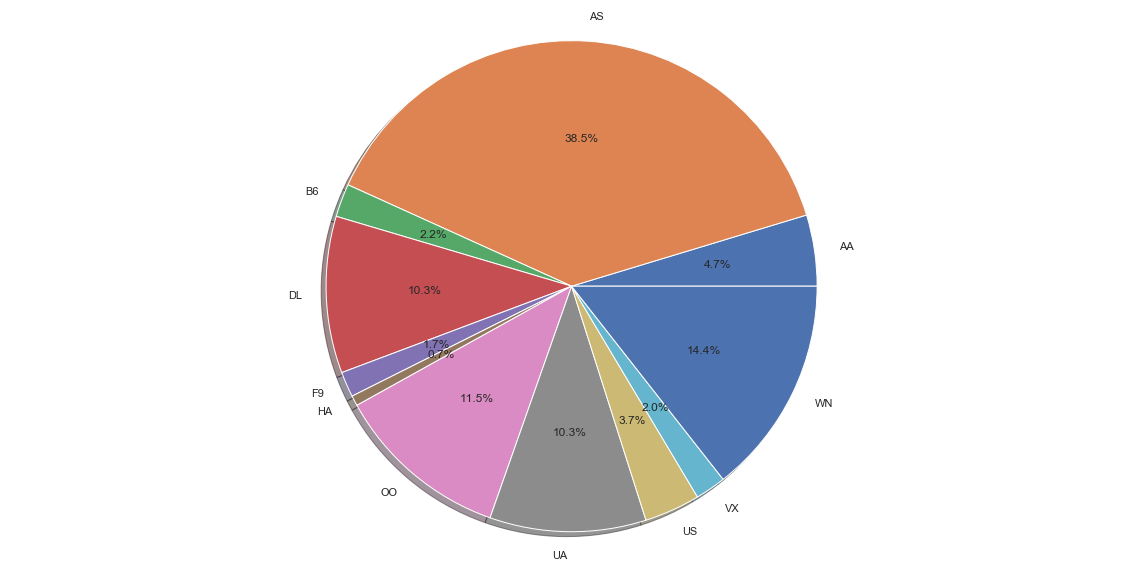

In [22]:
labels = copy_df['carrier'].astype('category').cat.categories.tolist()
counts = copy_df['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels] 
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## explore the feature engineering for categorical data

In [ ]:
# practice different techniques to encode the categorical data to numeric quantities 
# in order to get faster operations and better performance sometimes
# here i just use the column ['Carrier'] as an example

### method 1: replace the categories with arbitrary values 

In [23]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

print(replace_map)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [24]:
# another way is to use dictionary comprehension instead of typing out each mapping

labels = copy_df['carrier'].astype('category').cat.categories.tolist()
replace_map_2 = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_2)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [25]:
# then apply the replace() from pandas on the copied dataset

encoding_1 = copy_df.copy()
encoding_1.replace(replace_map_2, inplace=True)

encoding_1.head()

,carrier,tailnum,origin,dest
0,2,N508AS,PDX,ANC
1,9,N195UW,SEA,CLT
2,8,N37422,PDX,IAH
3,9,N547UW,PDX,CLT
4,2,N762AS,SEA,ANC


### method 2: label encoding

In [26]:
# alphabetically label encoding using cat.codes, only on categorical data
# or map a bunch of categories within a feature to some numeric value 
# and map all the other categories to some other value (One VS All or One VS Rest)

encoding_2 = copy_df.copy()
encoding_2['US_code'] = np.where(encoding_2['carrier'].str.contains('US'), 1, 0)

encoding_2.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


### another way of label encoding is to use Sklearn

In [27]:
encoding_3 = copy_df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
encoding_3['carrier_code'] = lb_make.fit_transform(encoding_3['carrier'])

encoding_3.head()

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


In [28]:
## however, the label encoding can cause problems sometimes 
## as this introduces weight associated with the values which are actually unordered
## which may then be misinterpreted by the algorithm.

### method 3: One Hot encoding

In [29]:
# using .get_dummies() in pandas

encoding_4 = copy_df.copy()
encoding_4 = pd.get_dummies(encoding_4, columns=['carrier'], prefix = ['carrier'])

encoding_4.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [30]:
# using LabelBinarizer and OneHotEncoder in sklearn

encoding_5 = copy_df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(encoding_5['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [31]:
# concatenate the resulting one hot encoding df with the original dataframe
# axis = 1 allows to merge on columns 

encoding_5 = pd.concat([encoding_5, lb_results_df], axis=1)
encoding_5.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [32]:
## while onehot encoding solves the problem of untrue weight of the values
## it can sometimes be troublesome as well which is referred to as the curse of dimensionality
## the model may also performs poorly when there are too many new columns 

In [33]:
## To deal with other miscellaneous features, 
## such as categorical feature which specify the ranges of values for observation points, 
## common way would be to replace the range with the mean/median value of that range.
## Or to split the range into two separate columns.

In [34]:
# an example to split the range on the delimiter '-' 

df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
df_age['start'], df_age['end'] = zip(*df_age['age'].map(lambda x: x.split('-')))

df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [35]:
df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

df_age['age_mean'] = df_age['age'].apply(lambda x: split_mean(x))

df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0
